In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"../data/marketingcampaigns.csv", sep=',', on_bad_lines='skip')

In [3]:
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.00
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.20,50000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.60,webinar,B2B,paid,0.70,90000.00


In [4]:
df.info

<bound method DataFrame.info of                                       campaign_name  start_date    end_date  \
0               Public-key multi-tasking throughput  2023-04-01  2024-02-23   
1                De-engineered analyzing task-force  2023-02-15  2024-04-22   
2     Balanced solution-oriented Local Area Network  2022-12-20  2023-10-11   
3                 Distributed real-time methodology  2022-09-26  2023-09-27   
4               Front-line executive infrastructure  2023-07-07  2024-05-15   
...                                             ...         ...         ...   
1027                            No revenue campaign  2023-02-01  2023-08-01   
1028                                    Random mess  2023-06-06         NaN   
1029                                 Invalid budget  2022-12-01  2023-06-01   
1030                              Overlapping dates  2023-03-01  2022-12-31   
1031                           Too many conversions  2023-05-01  2023-11-01   

        budget   ro

In [5]:
df.head(2)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10


In [6]:
df.shape #filas y columnas

(1032, 10)

In [7]:
df.columns #columnas

Index(['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type',
       'target_audience', 'channel', 'conversion_rate', 'revenue'],
      dtype='object')

In [8]:
df.isnull().sum() #suma de los valores nulos por columna

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [9]:
df.isnull().sum() / len(df) * 100    #proporcion de los valores nulos por columna

campaign_name      0.000000
start_date         0.096899
end_date           0.193798
budget             0.290698
roi                0.387597
type               0.096899
target_audience    0.193798
channel            0.096899
conversion_rate    0.387597
revenue            0.290698
dtype: float64

In [10]:
df.duplicated() #verifica si hay filas duplicadas

0       False
1       False
2       False
3       False
4       False
        ...  
1027    False
1028    False
1029    False
1030    False
1031    False
Length: 1032, dtype: bool

In [11]:
df.duplicated().sum() #suma de los valores duplicados por fila

np.int64(15)

In [12]:
df = df.drop_duplicates() #elimina filas duplicadas

In [13]:
df.duplicated().sum() #suma de los valores duplicados por fila

np.int64(0)

<Axes: >

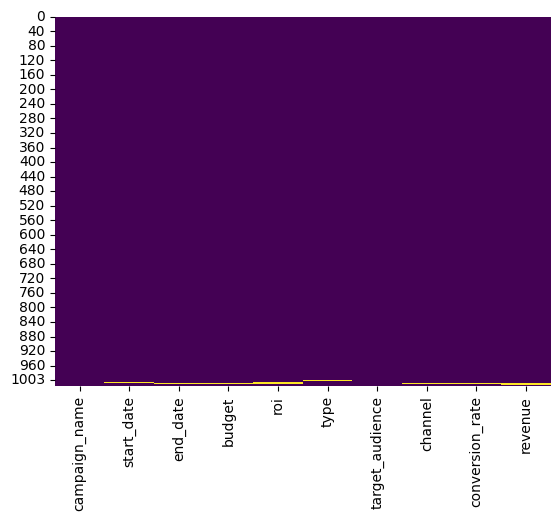

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #grafica de los valores nulos

In [15]:
# Ensure the data is properly separated into columns
df = pd.read_csv(r"../data/marketingcampaigns.csv", sep=',', on_bad_lines='skip')

# Convert 'start_date' and 'end_date' to datetime
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Calculate the mean dates
fecha_inicio_promedio = df['start_date'].mean()
fecha_fin_promedio = df['end_date'].mean()

print("Fecha promedio de inicio:", fecha_inicio_promedio)
print("Fecha promedio de fin:", fecha_fin_promedio)


Fecha promedio de inicio: 2023-01-30 14:19:14.518950144
Fecha promedio de fin: 2024-01-30 01:05:46.355685120


In [16]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

start_mean = df['start_date'].mean()
end_mean = df['end_date'].mean()

df['start_date'].fillna(start_mean, inplace=True)
df['end_date'].fillna(end_mean, inplace=True)


In [17]:
#canal mas utilizado
canal_mas_usado = df['channel'].mode()[0]
print("Canal más frecuente:", canal_mas_usado)


Canal más frecuente: promotion


In [18]:
moda_channel = df['channel'].mode()[0]  # Obtiene el valor más frecuente
df['channel'].fillna(moda_channel, inplace=True)


In [19]:
#calcular media de columnas numericas
# Forzar conversión a numérico ignorando errores
columnas_numericas = ['roi', 'budget', 'conversion_rate', 'revenue']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convierte strings a NaN si no se puede

# Calcular la media
for col in columnas_numericas:
    media = df[col].mean()
    print(f"Media de {col}: {media:.2f}")


Media de roi: 0.53
Media de budget: 58995.98
Media de conversion_rate: 0.54
Media de revenue: 511591.20


In [20]:
columnas_numericas = ['roi', 'budget', 'conversion_rate', 'revenue']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Asegura que sean numéricas
    media = df[col].mean()  # Calcula la media ignorando NaNs
    df[col].fillna(media, inplace=True)  # Rellena los nulos con la media


##### Como habían pocos datos nulos, he decidido rellenar con la media

In [21]:
# Calcular la moda (valor más común) de cada columna
type_moda = df['type'].mode()[0]
audiencia_moda = df['target_audience'].mode()[0]

# Rellenar los valores nulos con la moda
df['type'].fillna(type_moda, inplace=True)
df['target_audience'].fillna(audiencia_moda, inplace=True)


In [22]:
# Ver el tipo de datos de la columna 'type'
tipo_type = df['type'].dtype
print(f'Type es: {tipo_type}')
tipo_target_audience = df['target_audience'].dtype
print(f'Target_audience es: {tipo_target_audience}')

Type es: object
Target_audience es: object


In [23]:
print(df.dtypes)

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object


In [24]:
df.isnull().sum() #verifico que ya no hay valores nulos en el dataframe limpio

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

In [25]:
df.isnull().sum() / len(df) * 100

campaign_name      0.0
start_date         0.0
end_date           0.0
budget             0.0
roi                0.0
type               0.0
target_audience    0.0
channel            0.0
conversion_rate    0.0
revenue            0.0
dtype: float64

<Axes: >

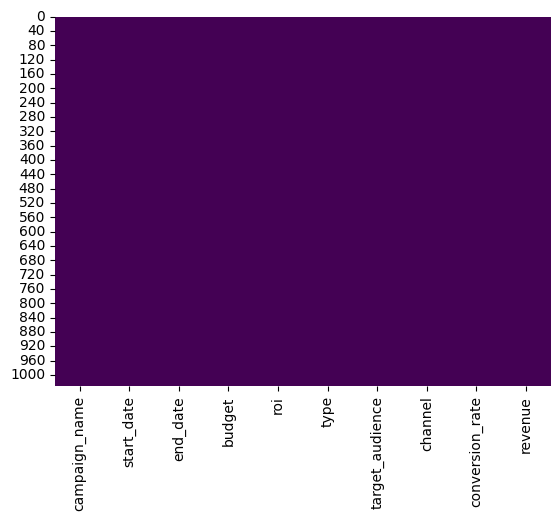

In [26]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #grafica de los valores nulos

In [27]:
print(df.columns.tolist())


['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']


In [28]:
df.columns = df.columns.str.strip() # Elimina espacios en blanco al inicio y al final de los nombres de las columnas

In [29]:
print(df.columns.tolist())

['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']


In [30]:
# sin tratar de separarlo en columnas.
with open(r"..\data\marketingcampaigns.csv", encoding='utf-8') as f:
    for i in range(10):
        print(f.readline())

campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue

Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.4,709593.48

De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.1

Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42

Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73

Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.3,social media,B2B,promotion,0.81,47511.35

Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11

Innovative context-sensitive framework,2023-03-01,2024-02-23,28964.45,0.59,email,B2C,referral,0.17,172882.59

User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.4,webinar,B2C,promotion,0.52,206241.46

Proactive neutral me

In [31]:
columnas_numericas = ['budget', 'roi', 'conversion_rate', 'revenue']

for col in columnas_numericas:
    if col in df.columns:
        print(f"✅ '{col}' está presente.")
    else:
        print(f"❌ '{col}' NO está en el DataFrame.")



✅ 'budget' está presente.
✅ 'roi' está presente.
✅ 'conversion_rate' está presente.
✅ 'revenue' está presente.


In [32]:
df['roi'] #una columna

0       0.350000
1       0.740000
2       0.370000
3       0.470000
4       0.300000
          ...   
1027    0.300000
1028    0.533804
1029    0.533804
1030    0.600000
1031    0.800000
Name: roi, Length: 1032, dtype: float64

In [33]:
#como arreglo los valores nulos sin cargarnos los datos originales
df_limpio = df.copy() #copia del dataframe original

In [34]:
df_limpio.head(3) #verifico que la copia se haya hecho bien

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42


In [35]:
df_limpio.isnull().sum() #verifico que ya no hay valores nulos en el dataframe limpio

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

In [36]:
df_limpio.duplicated().sum() #suma de los valores duplicados por fila

np.int64(15)

In [37]:
df_limpio = df_limpio.drop_duplicates() #elimina filas duplicadas

In [38]:
df_limpio.duplicated().sum() #suma de los valores duplicados por fila

np.int64(0)

In [39]:
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23 00:00:00.000000000,8082.300000,0.350000,email,B2B,organic,0.400000,709593.480000
1,De-engineered analyzing task-force,2023-02-15,2024-04-22 00:00:00.000000000,17712.980000,0.740000,email,B2C,promotion,0.660000,516609.100000
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11 00:00:00.000000000,84643.100000,0.370000,podcast,B2B,paid,0.280000,458227.420000
3,Distributed real-time methodology,2022-09-26,2023-09-27 00:00:00.000000000,14589.750000,0.470000,webinar,B2B,organic,0.190000,89958.730000
4,Front-line executive infrastructure,2023-07-07,2024-05-15 00:00:00.000000000,39291.900000,0.300000,social media,B2B,promotion,0.810000,47511.350000
...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01 00:00:00.000000000,20000.000000,0.300000,social media,B2B,organic,0.500000,511591.195277
1028,Random mess,2023-06-06,2024-01-30 01:05:46.355685120,100000.000000,0.533804,podcast,B2B,referral,0.541936,300000.000000
1029,Invalid budget,2022-12-01,2023-06-01 00:00:00.000000000,58995.980506,0.533804,email,B2C,promotion,0.200000,50000.000000
1030,Overlapping dates,2023-03-01,2022-12-31 00:00:00.000000000,60000.000000,0.600000,webinar,B2B,paid,0.700000,90000.000000


In [40]:
df_limpio.to_csv(r'../data/marketingcampaigns_limpio.csv',index=False) #guardo el dataframe limpio en un nuevo archivo csv